# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [2]:
X, y = mnist['data'], mnist['target']

X.shape # (70000, 784)  # X INPUT all the features of the handwritten number (70000 rows, 784 columns)
y.shape # (70000,)      # Y is the TARGET ( the actual number)

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [3]:
y[36000]

'9'

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

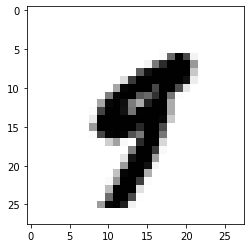

In [4]:
import matplotlib 
import matplotlib.pyplot as plt

plt.imshow(X[36000].reshape(28,28), cmap = matplotlib.cm.binary, interpolation="nearest")



### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [5]:
y[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [19]:
# X are the features we use as input for the model (60k rows in total)

X_train = X[:60000]
X_test = X[60000:]  

# Y is the expected outcome/label (10k rows in total)

y_train= y[:60000]
y_test = y[60000:]



In [7]:
# How does y looks like? 

y_train # The outcome we need , which is the actual number from 0 to 9

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [18]:
# Make the target (y_test & y_train ) binary 5=1 and other numbers = 0

y_train5 = np.where(y_train == '5', 1 , 0)
y_test5 = np.where(y_test == '5', 1 , 0)



### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [ ]:
from sklearn.linear_model import LogisticRegression

# X_train = all the features / index [0:60000]
# y_train5 = outcome / Binary version/ All 5's are’ 1 and other numbers are 0

find5_model = LogisticRegression().fit(X_train, y_train5)


### Does the classifier predict correctly the 36000th digit we picked before?

In [10]:
# y_train[36000]

In [ ]:
# Yes the output is 0 because the 36000th digit is not the number 5

find5_model.predict(X_train[36000].reshape(1,-1))



### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [12]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None): # doesn't do anyhting
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Fit the model
never5_model = never_5_clf.fit(X_train, y_train5)

# predictions
y_pred_test2 =  Never5Classifier().predict(X_test)

print(confusion_matrix(y_test5,y_pred_test2))

# 9108 true negative
# 892  false positive , were 5 but classified as not 5

accuracy2 = 9108 / (9108 + 892)

accuracy2

[[9108    0]
 [ 892    0]]


0.9108

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [21]:
# FIND 5 MODEL 

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


# MODEL & PREDICTIONS


find5_model = LogisticRegression().fit(X_train, y_train5)
y_pred_test =  find5_model.predict(X_test)


# EVALUATION

print('Confusion Matrix:','\n', confusion_matrix(y_test5, y_pred_test),'\n')

accuracy = (9034 + 745) / (9034+ 745 +147 +74)

print('Accuracy:', accuracy,'\n')

print('Precision:', precision_score(y_test5, y_pred_test), '\n')

print('Recall/Sensitivity:', recall_score(y_test5, y_pred_test), '\n')

print('F1-Score:', f1_score(y_test5, y_pred_test),  '\n')
 

Confusion Matrix: 
 [[9034   74]
 [ 147  745]] 

Accuracy: 0.9779 

Precision: 0.9096459096459096 

Recall/Sensitivity: 0.8352017937219731 

F1-Score: 0.8708357685563999 



/usr/local/Cellar/jupyterlab/2.1.4/libexec/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# NEVER 5 MODEL

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# MODEL & PREDICTIONS


#never_5_clf = Never5Classifier()
never5_model = never_5_clf.fit(X_train, y_train5)
y_pred_test2 = Never5Classifier().predict(X_test)


# EVALUATION

print('Confusion Matrix:','\n', confusion_matrix(y_test5, y_pred_test2),'\n')

accuracy = (9108) / (9108+892)

print('Accuracy:', accuracy,'\n')

#  Precision = true positives / true positives + false POSITIVES
print('Precision:', precision_score(y_test5, y_pred_test2), '\n')

# Recall =  true positives / true positives + false NEGATIVES
print('Recall/Sensitivity:', recall_score(y_test5, y_pred_test2), '\n') # how many TP

# Average of precision and recall
print('F1-Score:', f1_score(y_test5, y_pred_test2),  '\n')

Confusion Matrix: 
 [[9108    0]
 [ 892    0]] 

Accuracy: 0.9108 

Precision: 0.0 

Recall/Sensitivity: 0.0 

F1-Score: 0.0 



/usr/local/Cellar/jupyterlab/2.1.4/libexec/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
# The fisrt model is better that the one that uses always the same output(always not 5).

# The first model has 97% accuracy Precision: 0.90, Recall: 0.83, F1-Score: 0.87

# The second model(always not 5) it has high accuracy of 91 but zero precision, recall or F1-score.

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

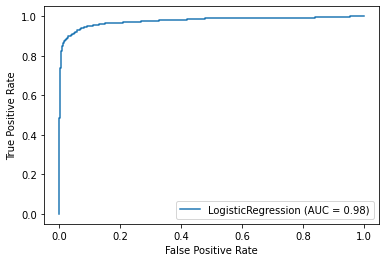

In [37]:
from sklearn import metrics
import matplotlib.pyplot as plt


metrics.plot_roc_curve(find5_model, X_test, y_test)
plt.show()

### Now find the roc_auc_score for each. 

In [50]:
from sklearn.metrics import roc_auc_score

metrics.roc_auc_score(y_test5, y_pred_test)


0.9135385341029717

In [54]:
fpr, tpr, threshold = plot_roc_curve(never5_model, y_test5, y_pred_test2)
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1], 'r--')
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.show()

ValueError: NoneType should be a binary classifier

### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
'''

ROC curve is better for the first model.


Is not good for the second model:
ROC is generated by changing the threshold on your predictions and finding the sensitivity and specificity for each threshold. 
This generally means that as you increase the threshold, 
your sensitivity decreases but your specificity increases and it draws a picture of the overall quality of your predicted probabilities. 
In this case, since everything is either 0 or 1 (or very close to it) there are no meaningful thresholds to use.

'''